# A vector-borne disease (VBD) model

The differential equations for the mosquito population dynamics are:

\begin{align}
\frac{dS_V}{dt} &= \mu_V N_V - \frac{a b_V}{N_H} S_V I_H - \mu_V S_V \\
\frac{dI_V}{dt} &= \frac{a b_V}{N_H} S_V I_H - \mu_V I_V
\end{align}

The differential equations for the human host population dynamics are:

\begin{align}
\frac{dS_H}{dt} &= - \frac{a b_H}{N_H} S_H I_V \\
\frac{dI_H}{dt} &= \frac{a b_H}{N_H} S_H I_V - r I_H \\
\frac{dR_H}{dt} &= r I_H
\end{align}

In [2]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import scipy.integrate
import numpy as np
import math

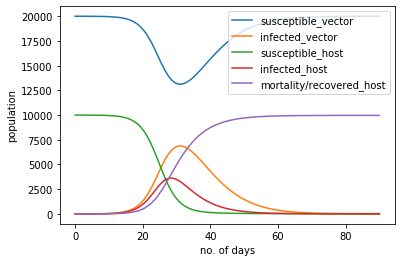

In [3]:
a=1 # biting rate
bv=0.4 # Probability of infection from an infected host to a susceptible vector
bh=0.4 # Probability of infection from an infected vector to a susceptible host
nuv=0.25 # Mortality rate of the vector
r=0.167 # Recovery rate of the host
nv=20000  # total no. of vectors
nh=10000   # total number of hosts
def du_dt(u,t):
    return([nuv*nv-u[3]*a*bv*u[0]/nh-nuv*u[0],a*bv*u[0]*u[3]/nh-nuv*u[1],-a*bh*u[2]*u[1]/nh,a*bh*u[2]*u[1]/nh-r*u[3],r*u[3]])
x=np.linspace(0,90,89)
y0=[nv,1,nh,1,0]
y=odeint(du_dt,y0,x)
plt.plot(x,y[:,0],label="susceptible_vector")
plt.plot(x,y[:,1],label="infected_vector")
plt.plot(x,y[:,2],label="susceptible_host")
plt.plot(x,y[:,3],label="infected_host")
plt.plot(x,y[:,4],label="mortality/recovered_host")
plt.xlabel("no. of days")
plt.ylabel("population")
plt.legend()
plt.show()

## Sensitivity of infection prevalence to the biting rate

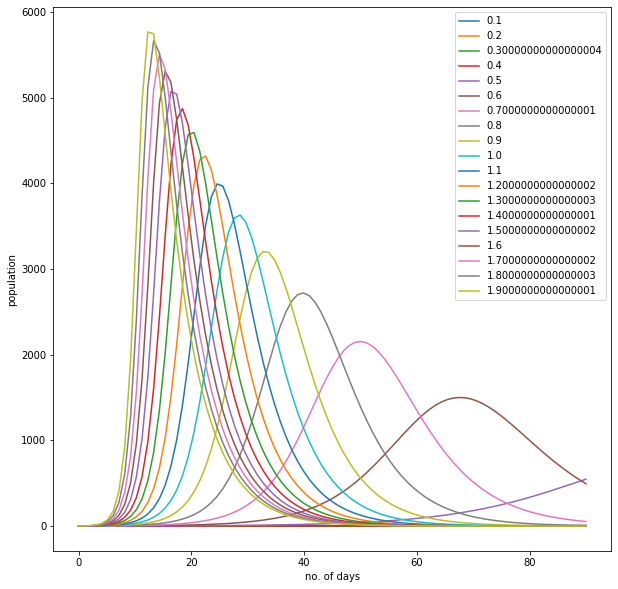

In [4]:
plt.figure(figsize=(10,10))
def f(a):
    #a=1 # biting rate
    bv=0.4 # Probability of infection from an infected host to a susceptible vector
    bh=0.4 # Probability of infection from an infected vector to a susceptible host
    nuv=0.25 # Mortality rate of the vector
    r=0.167 # Recovery rate of the host
    nv=20000  # total no. of vectors
    nh=10000   # total number of hosts
    def du_dt(u,t):
        return([nuv*nv-u[3]*a*bv*u[0]/nh-nuv*u[0],a*bv*u[0]*u[3]/nh-nuv*u[1],-a*bh*u[2]*u[1]/nh,a*bh*u[2]*u[1]/nh-r*u[3],r*u[3]])
    x=np.linspace(0,90,89)
    y0=[nv,1,nh,1,0]
    y=odeint(du_dt,y0,x)
    #plt.plot(x,y[:,0],label="susceptible_vector")
    #plt.plot(x,y[:,1],label="infected_vector")
    #plt.plot(x,y[:,2],label="susceptible_host")
    #plt.plot(x,y[:,3],label="infected_host")
    #plt.plot(x,y[:,4],label="mortality/recovered_host")
    return(x,y[:,3])
for i in np.arange(0.1,2.0,0.1):
    x,y=f(i)
    plt.plot(x,y,label=i)
plt.xlabel("no. of days")
plt.ylabel("population")
plt.legend()
plt.show()

# Coding vector control interventions

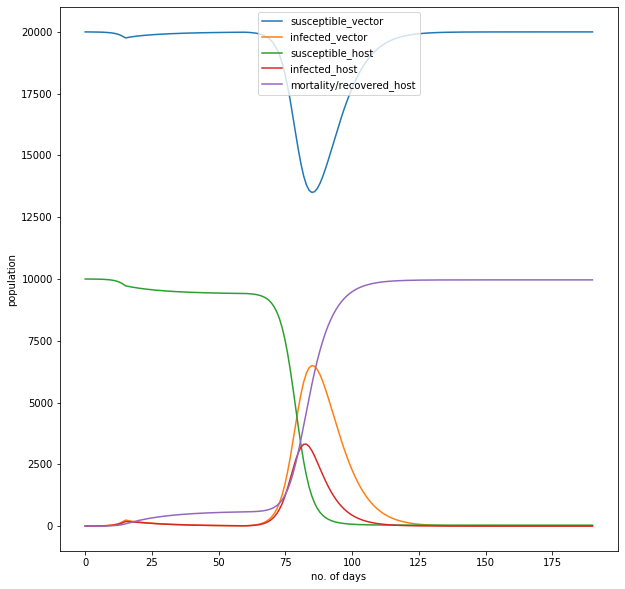

In [5]:
a=1 # biting rate
bv=0.4 # Probability of infection from an infected host to a susceptible vector
bh=0.4 # Probability of infection from an infected vector to a susceptible host
nuv=0.25 # Mortality rate of the vector
r=0.167 # Recovery rate of the host
nv=20000  # total no. of vectors
nh=10000   # total number of hosts
def du_dt(u,t):
    if (t<= 15):
         a = 1
    elif (t > 15 and t <= 60):
        a = 0.25
    elif (t > 60): 
        a = 1
    return([nuv*nv-u[3]*a*bv*u[0]/nh-nuv*u[0],a*bv*u[0]*u[3]/nh-nuv*u[1],-a*bh*u[2]*u[1]/nh,a*bh*u[2]*u[1]/nh-r*u[3],r*u[3]])
x=np.linspace(0,190,189)
y0=[nv,1,nh,1,0]
y=odeint(du_dt,y0,x)
plt.figure(figsize=(10,10))
plt.plot(x,y[:,0],label="susceptible_vector")
plt.plot(x,y[:,1],label="infected_vector")
plt.plot(x,y[:,2],label="susceptible_host")
plt.plot(x,y[:,3],label="infected_host")
plt.plot(x,y[:,4],label="mortality/recovered_host")
plt.xlabel("no. of days")
plt.ylabel("population")
plt.legend()
plt.show()